<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# AI in Finance

**Workshop at Texas State University (October 2023)**

**_Financial Data APIs_**

Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

## EODHistoricalData

The following requires an account for [EODHistoricalData](https://bit.ly/eod_data).

You need to generate/use an API key to execute the following code.

I have created a simple Python file to store my credentials that looks as follows:

In [1]:
!cat creds.cfg_

eod_key = "YOUR_EOD_KEY"
openai_key = "YOUR_OPENAI_KEY"

You can then import our `tpqeod` wrapper:

**IMPORTANT**: The EOD Python wrapper class/package is work-in-progress. Significant changes are possible. The following is only for illustration purposes.

In [2]:
from tpqeod import tpqeod

In [3]:
# adjust the path to your file
%run ../creds.py

In [4]:
api=tpqeod(eod_key)

## Getting AdjClose for Multiple Stocks

In [5]:
import pandas as pd

In [6]:
tickers=['AAPL', 'MSFT', 'AMZN', 'NFLX', 'META', 'GOOG']

In [7]:
prices=pd.DataFrame()
for ticker in tickers:
    print(ticker)
    d=api.get_eod_data(ticker, start=pd.Timestamp('2014-7-1'))
    prices[ticker]=d['Adjusted_close']

AAPL
MSFT
AMZN
NFLX
META
GOOG


In [8]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2014-07-01 to 2023-10-25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2347 non-null   float64
 1   MSFT    2347 non-null   float64
 2   AMZN    2347 non-null   float64
 3   NFLX    2347 non-null   float64
 4   META    2347 non-null   float64
 5   GOOG    2347 non-null   float64
dtypes: float64(6)
memory usage: 128.4 KB


In [9]:
prices

,AAPL,MSFT,AMZN,NFLX,META,GOOG
Date,,,,,,
2014-07-01,20.7622,35.8445,16.6195,67.5857,68.06,29.0537
2014-07-02,20.7533,35.8701,16.6425,66.6771,66.45,29.0370
2014-07-03,20.8754,35.7845,16.8746,67.4786,66.29,29.1564
2014-07-07,21.3057,35.9472,16.6775,65.8029,65.29,29.0328
2014-07-08,21.1685,35.7674,16.1905,63.5786,62.76,28.4763
...,...,...,...,...,...,...
2023-10-19,175.4600,331.3200,128.4000,401.7700,312.81,138.9800
2023-10-20,172.8800,326.6700,125.1700,400.9600,308.65,136.7400
2023-10-23,173.0000,329.3200,126.5600,406.8400,314.01,137.9000


In [10]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format='svg' 

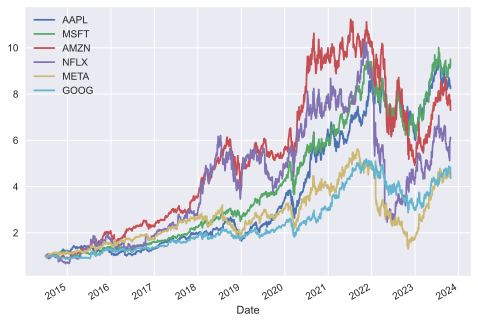

In [11]:
(prices / prices.iloc[0]).plot();

In [12]:
# prices.to_csv('../sources/eod_prices.csv')

## Getting Fundamentals for Multiple Stocks

In [13]:
fundamentals=pd.DataFrame()
for ticker in tickers:
    print(ticker)
    f=api.get_fundamentals(ticker, as_json=True)
    fundamentals=pd.concat((fundamentals, pd.DataFrame(f['Highlights'],
                                                         index=[ticker])))

AAPL
MSFT
AMZN
NFLX
META
GOOG


In [14]:
fundamentals.T

,AAPL,MSFT,AMZN,NFLX,META,GOOG
MarketCapitalization,2675011747840,2531948232704,1252477763584,179995901952,770738618368,1578270195712
MarketCapitalizationMln,2675011.7478,2531948.2327,1252477.7636,179995.902,770738.6184,1578270.1957
EBITDA,123957002240,108530999296,63431000064,6371565056,51759001600,93340999680
PERatio,28.7563,33.0107,96.3413,43.8433,34.951,24.2663
PEGRatio,2.7503,2.2748,11.85,2.3693,2.6345,1.3438
WallStreetTargetPrice,187.73,370.22,160.61,433.98,341.68,135.34
BookValue,3.852,29.702,16.348,50.511,55.463,21.785
DividendShare,0.93,2.72,0.0,0.0,0.0,0.0
DividendYield,0.0056,0.0088,0.0104,0.0,0.0,0.0
EarningsShare,5.95,10.32,1.26,9.38,8.57,5.22


In [15]:
# fundamentals.T.to_csv('../sources/eod_fundamentals.csv')

## Fundamentals for More Stocks

In [16]:
dax_constituents=api.get_fundamentals(symbol='GDAXI', exchange='INDX', table='Components')

In [17]:
dax_constituents.head()

,Code,Exchange,Name,Sector,Industry
0,RWE,XETRA,RWE AG,Utilities,Utilities - Diversified
1,FRE,XETRA,Fresenius SE & Co. KGaA,Healthcare,Medical Care Facilities
2,DB1,XETRA,Deutsche Börse AG,Financial Services,Financial Data & Stock Exchanges
3,ALV,XETRA,Allianz SE VNA O.N.,Financial Services,Insurance - Diversified
4,DHL,XETRA,Deutsche Post AG,Industrials,Integrated Freight & Logistics


In [18]:
highlights=list()
for ticker in dax_constituents['Code']:
    print(ticker, end=' ' )
    highlights.append(api.get_fundamentals(symbol=ticker,
                                           exchange='XETRA',
                                           table='Highlights'))

RWE FRE DB1 ALV DHL MUV2 ADS MRK DTE DBK RHM SAP SY1 CBK SIE BAYN BNR MBG HEI QIA CON BEI BAS BMW IFX EOAN MTX HNR1 PAH3 VOW3 HEN3 SRT3 ZAL VNA 1COV AIR SHL ENR DTG P911 

In [19]:
dax_fundamentals=pd.DataFrame(highlights, index=dax_constituents['Code'])

In [20]:
dax_fundamentals.T

Code,RWE,FRE,DB1,ALV,DHL,MUV2,ADS,MRK,DTE,DBK,...,HEN3,SRT3,ZAL,VNA,1COV,AIR,SHL,ENR,DTG,P911
MarketCapitalization,26086504448,14069659648,28626538496,88409817088,43821527040,52072783872,30621151232,62868897792,101865766912,20921896960,...,26319904768,13729606656,5661171712,16559778816,9204828160,98741829632,53540421632,5759648256,24811134976,75163336704
MarketCapitalizationMln,26086.5044,14069.6596,28626.5385,88409.8171,43821.527,52072.7839,30621.1512,62868.8978,101865.7669,20921.897,...,26319.9048,13729.6067,5661.1717,16559.7788,9204.8282,98741.8296,53540.4216,5759.6483,24811.135,75163.3367
EBITDA,1635999616.0,4674999808.0,2636924928.0,11594000384.0,9004000256.0,2724999936.0,669000000.0,6226999808.0,35918000128.0,NaN,...,2731000064.0,1009200000.0,330100000.0,2064300032.0,894000000.0,7081999872.0,3144000000.0,-985000000.0,5616999936.0,9310000128.0
PERatio,9.9348,14.0337,17.1397,10.0296,10.1322,18.6313,NaN,20.3949,18.455,4.4882,...,20.7839,42.4903,70.5161,NaN,NaN,25.5347,33.6831,NaN,7.8429,NaN
PEGRatio,0.9814,1.001,2.7932,0.6383,6.3085,0.1935,4.9864,3.0897,0.9661,0.1218,...,1.9454,2.5255,1.4038,4.3352,0.5107,1.0451,NaN,NaN,NaN,NaN
WallStreetTargetPrice,50.9,37.6,193.7,252.1,50.5,384.4,188.3,196.4,25.4,13.3,...,71.6,329.3,36.09,29.2,53.3,137.67,56.8,17.9,43.1,113.5
BookValue,43.628,35.662,48.027,136.958,18.448,200.554,26.827,61.443,11.988,34.875,...,46.404,29.082,8.795,33.541,36.272,19.158,15.449,10.581,24.885,21.33
DividendShare,0.9,0.92,3.6,11.4,1.85,11.6,0.7,2.2,0.7,0.3,...,1.85,1.44,0.0,0.85,0.0,1.8,0.95,0.1,1.3,1.01
DividendYield,0.0265,0.0365,0.0232,0.0523,0.0493,0.031,0.0041,0.0152,0.0342,0.0316,...,0.0276,0.0061,0.0,0.0413,0.0856,0.0144,0.0199,0.0053,0.0436,0.0116
EarningsShare,3.53,1.78,9.09,21.95,3.63,20.53,-1.93,7.09,1.11,2.29,...,3.24,5.14,0.31,-8.02,-4.51,4.9,1.42,-4.01,3.82,NaN


In [21]:
# dax_fundamentals.T.to_csv('../sources/eod_dax_fundamentals.csv')

## Available Exchanges

In [22]:
print(sorted(api.get_exchange_codes()))

['AS', 'AT', 'AU', 'BA', 'BC', 'BE', 'BK', 'BR', 'BRVM', 'BUD', 'CC', 'CM', 'CO', 'DSE', 'DU', 'EGX', 'EUFUND', 'F', 'FOREX', 'GSE', 'HA', 'HE', 'HM', 'IC', 'IL', 'IR', 'IS', 'JK', 'JSE', 'KAR', 'KLSE', 'KO', 'KQ', 'LIM', 'LS', 'LSE', 'LU', 'LUSE', 'MC', 'MCX', 'MONEY', 'MSE', 'MU', 'MX', 'NEO', 'NSE', 'OL', 'PA', 'PR', 'PSE', 'RO', 'RSE', 'SA', 'SEM', 'SHE', 'SHG', 'SN', 'SR', 'ST', 'STU', 'SW', 'TA', 'TO', 'TW', 'TWO', 'US', 'USE', 'V', 'VFEX', 'VI', 'VN', 'WAR', 'XBOT', 'XETRA', 'XNAI', 'XNSA', 'XZIM', 'ZSE']


## Fundamentals for Exchanges

In [23]:
api.get_exchange_data('ZSE')

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
ZSE,Zagreb Stock Exchange,ZSE,XZAG,Croatia,EUR,HR,HRV


In [24]:
api.get_exchange_data('BE')

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
BE,Berlin Exchange,BE,XBER,Germany,EUR,DE,DEU


In [25]:
api.get_exchange_data('All')

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
0,USA Stocks,US,"XNAS, XNYS",USA,USD,US,USA
1,London Exchange,LSE,XLON,UK,GBP,GB,GBR
2,NEO Exchange,NEO,NEOE,Canada,CAD,CA,CAN
3,TSX Venture Exchange,V,XTSX,Canada,CAD,CA,CAN
4,Toronto Exchange,TO,XTSE,Canada,CAD,CA,CAN
...,...,...,...,...,...,...,...
73,Money Market Virtual Exchange,MONEY,None,Unknown,Unknown,,
74,Europe Fund Virtual Exchange,EUFUND,None,Unknown,EUR,,
75,Istanbul Stock Exchange,IS,XIST,Turkey,TRY,TR,TUR
76,FOREX,FOREX,CDSL,Unknown,Unknown,,


## Available Ticker for an Exchange

In [26]:
api.get_ticker_list('ZSE')

,Code,Name,Country,Exchange,Currency,Type,Isin
0,ADPL,AD Plastik d.d.,Croatia,ZSE,EUR,Common Stock,None
1,ADRS,Adris Grupa d.d.,Croatia,ZSE,EUR,Common Stock,None
2,ADRS2,Adris Grupa d.d. Pfd.,Croatia,ZSE,EUR,Common Stock,None
3,ARNT,Arena Hospitality Group d.d.,Croatia,ZSE,EUR,Common Stock,None
4,ATGR,Atlantic Grupa d.d.,Croatia,ZSE,EUR,Common Stock,None
5,ATPL,Atlantska Plovidba d.d.,Croatia,ZSE,EUR,Common Stock,None
6,DDJH,Djuro Djakovic Grupa d.d.,Croatia,ZSE,EUR,Common Stock,None
7,DLKV,Dalekovod d.d.,Croatia,ZSE,EUR,Common Stock,None
8,ERNT,Ericsson Nikola Tesla d.d.,Croatia,ZSE,EUR,Common Stock,None
9,HPB,Hrvatska Postanska Banka d.d.,Croatia,ZSE,EUR,Common Stock,None


## Searching for an Symbol

In [27]:
api.search('tesla', limit=25, asset_type='all' )

,Code,Exchange,Name,Type,Country,Currency,ISIN,previousClose,previousCloseDate
0,TSLA,US,Tesla Inc,Common Stock,USA,USD,US88160R1014,212.4200,2023-10-25
1,3STP,LSE,GraniteShares 3x Short Tesla Daily ETP,ETF,UK,GBX,XS2193972671,1685.7500,2023-10-25
2,3TSL,LSE,Leverage Shares 3x Tesla ETP Scs,ETF,UK,GBX,XS2297549128,16.6685,2023-10-25
3,3STS,LSE,GraniteShares 3x Short Tesla Daily ETP,ETF,UK,USD,None,20.4725,2023-10-25
4,TSLQ,LSE,Leverage Shares -3x Short Tesla ETP Securities...,ETF,UK,GBX,None,2.2150,2023-10-25
5,TL0,XETRA,Tesla Inc,Common Stock,Germany,EUR,US88160R1014,205.6500,2023-10-25
6,2TSL,LSE,Leverage Shares 2x Tesla ETP Scs,ETF,UK,GBX,None,10623.5000,2023-10-25
7,TSLA,MX,Tesla Inc,Common Stock,Mexico,MXN,None,3896.3999,2023-10-25
8,TSL3,LSE,Leverage Shares 3x Tesla ETP Securities,ETF,UK,USD,XS2297549128,0.2007,2023-10-25
9,STSL,LSE,Leverage Shares -1x Tesla ETC,ETF,UK,GBX,IE00BKT6ZH01,60.2500,2023-10-25


## Economic Calendar for historic and upcoming events

In [28]:
import datetime as dt

In [29]:
api.get_calendar('splits', start=dt.datetime(2023, 10, 1), stop=dt.datetime(2023, 10, 31))

,Code,Split_Date,Optionable,Old_Shares,New_Shares
0,9568.SR,2023-10-01,N,1,20
1,1303.SR,2023-10-01,N,1,20
2,2320.SR,2023-10-01,N,2,3
3,GHU.MU,2023-10-02,N,10,1
4,HDM.DU,2023-10-02,N,1,3
...,...,...,...,...,...
284,MXC.AU,2023-10-30,N,1000,1
285,155900.KO,2023-10-31,N,1,0
286,1449.TW,2023-10-31,N,1000,1029
287,397030.KO,2023-10-31,N,1,2


The following events are available:
 - earnings
 - ipos
 - splits
 - ipos
 
 Data can restricted to one ticker by providing the symbol as parameter.
 If start or stop date is ommited, the present day is used as start date and the present day plus 7 days is used as stop date.

## Historic splits and dividends

In [30]:
api.get_hist_splits("AAPL", exchange='US', start=dt.datetime(2000, 1, 1))

,Stock Splits
Date,
2000-06-21,2.000000/1.000000
2005-02-28,2.000000/1.000000
2014-06-09,7.000000/1.000000
2020-08-31,4.000000/1.000000


In [31]:
api.get_hist_dividends("AAPL", exchange='US')

,Dividends
Date,
1987-05-11,0.00054
1987-08-10,0.00054
1987-11-17,0.00071
1988-02-12,0.00071
1988-05-16,0.00071
...,...
2022-08-05,0.23000
2022-11-04,0.23000
2023-02-10,0.23000


## Historical Tick Data

In [32]:
%%time
ticks = api.get_tick_data('AAPL', start=dt.datetime(2023, 10, 2, 0, 0, 0),
                         stop=dt.datetime(2023, 10, 2, 23, 59, 59))

CPU times: user 813 ms, sys: 280 ms, total: 1.09 s
Wall time: 15.4 s


Please note: get_tick_data is available only for 'US' exchanges.

In [33]:
ticks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 617245 entries, (Timestamp('2023-10-02 05:00:17.415000'),) to (Timestamp('2023-10-03 04:59:43.278000'),)
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ex       617245 non-null  object 
 1   mkt      617245 non-null  object 
 2   price    617245 non-null  float64
 3   seq      617245 non-null  int64  
 4   shares   617245 non-null  int64  
 5   sl       617245 non-null  object 
 6   sub_mkt  617245 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 46.1+ MB


In [34]:
ticks.head()

,ex,mkt,price,seq,shares,sl,sub_mkt
2023-10-02 05:00:17.415,Q,Q,172.52,1804703,1,@ TI,
2023-10-02 05:00:17.415,Q,Q,172.51,1804704,3,@ TI,
2023-10-02 05:00:17.415,Q,Q,172.51,1804705,50,@ TI,
2023-10-02 05:00:17.415,Q,Q,172.51,1804706,50,@ TI,
2023-10-02 05:00:17.415,Q,Q,172.50,1804707,1,@ TI,


## Technical Indicators

In [35]:
mavg = api.get_technical_indicator('AMZN', 'US', function='sma', period=7,
                                   start=dt.datetime(2022, 1, 1),
                                   stop=dt.datetime(2022, 12, 31))

In [36]:
mavg.head()

,Sma
Date,
2022-01-11,164.9914
2022-01-12,164.2489
2022-01-13,163.3477
2022-01-14,163.0307
2022-01-18,162.4112


In [37]:
prices = api.get_eod_data('AMZN', 'US', start=dt.datetime(2022, 1, 11),
                        stop=dt.datetime(2022, 12, 31))['Adjusted_close']

In [38]:
prices.head()

Date
2022-01-11    165.3620
2022-01-12    165.2070
2022-01-13    161.2140
2022-01-14    162.1380
2022-01-18    158.9175
Name: Adjusted_close, dtype: float64

In [39]:
data = pd.concat([prices, mavg], axis=1)

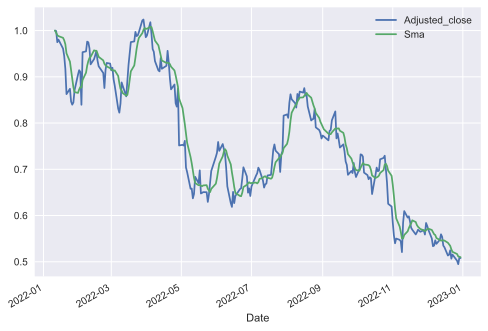

In [40]:
(data / data.iloc[0]).plot();

Available values for the indicator function are: `'splitadjusted', 'avgvol', 'avgvolccy', 'sma', 'ema', 'wma', 'volatility', 'rsi', 'stddev', 'stochastic', 'stochrsi', 'slope', 'dmi', 'adx', 'macd', 'atr', 'cci', 'sar' and 'bbands'`.

See also https://eodhd.com/financial-apis/technical-indicators-api/

## Live Tick Data (stream)

In [41]:
import time

In [42]:
api.get_live_crypto_data('ETH-USD')

The data is stored in the attribute crypto_data

In [43]:
time.sleep(5)
api.crypto_data

{'ETH-USD':                                s              p           q      dc       dd
 2023-10-26 12:44:17.537  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.646  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.752  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.848  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.859  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.901  ETH-USD  1822.08085204  2.31391103  2.0271  36.9358
 2023-10-26 12:44:17.936  ETH-USD  1822.08085204  2.31392037  2.0271  36.9358
 2023-10-26 12:44:18.020  ETH-USD  1822.08085204  2.31392037  2.0271  36.9358
 2023-10-26 12:44:18.058  ETH-USD  1821.85704904  2.24562436  2.0151   36.712
 2023-10-26 12:44:18.105  ETH-USD  1821.85704904  2.24562436  2.0151   36.712
 2023-10-26 12:44:18.206  ETH-USD  1821.85664589   2.2451665  2.0151  36.7116
 2023-10-26 12:44:18.323  ETH-USD  1821.85664589   2.

That attribute is a dictionary containing the DataFrame as value and the according symbol as key and can hold data for several symbols. 

In [44]:
api.get_live_crypto_data('BTC-USD')

In [45]:
time.sleep(5)
api.crypto_data

{'ETH-USD':                                s              p           q      dc       dd
 2023-10-26 12:44:17.537  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.646  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.752  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.848  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 2023-10-26 12:44:17.859  ETH-USD  1822.08325852  2.07346155  2.0273  36.9382
 ...                          ...            ...         ...     ...      ...
 2023-10-26 12:44:27.105  ETH-USD   1821.7521734   2.5111949  2.0094  36.6072
 2023-10-26 12:44:27.208  ETH-USD   1821.7521734   2.5111949  2.0094  36.6072
 2023-10-26 12:44:27.342  ETH-USD   1821.7521734   2.5111949  2.0094  36.6072
 2023-10-26 12:44:27.424  ETH-USD  1821.75204111   2.5111949  2.0094   36.607
 2023-10-26 12:44:27.458  ETH-USD  1821.75204111   2.5111949  2.0094   36.607
 
 [113 rows x 5 columns],
 'BTC-USD':               

In [46]:
api.crypto_data['BTC-USD']

,s,p,q,dc,dd
2023-10-26 12:44:22.637,BTC-USD,34307.88182461,0.16886808,1.1246,385.8381
2023-10-26 12:44:22.741,BTC-USD,34307.88182461,0.16886808,1.1246,385.8381
2023-10-26 12:44:22.849,BTC-USD,34307.88182461,0.16886808,1.1246,385.8381
2023-10-26 12:44:22.902,BTC-USD,34307.88182461,0.16740214,1.1246,385.8381
2023-10-26 12:44:22.927,BTC-USD,34307.88904406,0.15985782,1.1247,385.8453
2023-10-26 12:44:23.081,BTC-USD,34307.88904406,0.15985782,1.1247,385.8453
2023-10-26 12:44:23.185,BTC-USD,34307.88904406,0.15985782,1.1247,385.8453
2023-10-26 12:44:23.396,BTC-USD,34307.88904406,0.15985782,1.1247,385.8453
2023-10-26 12:44:23.425,BTC-USD,34307.83853699,0.15985782,1.1245,385.7948
2023-10-26 12:44:23.500,BTC-USD,34307.83853699,0.15985782,1.1245,385.7948


In [47]:
api.close_crypto_stream()

There are further streams for:
 - forex data: get_live_forex_data(symbol)
 - trade data: get_live_trade_data(symbol)
 - quote data: get_live_quote_data(symbol)

<img src='http://hilpisch.com/tpq_logo.png' width="35%" align="right">

<br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">ai@tpq.io</a>